In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install pyspark 


[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install pyarrow
!pip install py4j
!pip install findspark


[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import findspark
findspark.init()

In [5]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.getOrCreate()

In [6]:
dfcustomer = pd.read_csv('./customer.csv', encoding='ISO-8859-1', delimiter=';')








In [7]:

dfcustomer=dfcustomer.fillna('non exist')
dfcustomer





,CustomerKey,GeographyKey,CustomerAlternateKey,Title,FirstName,MiddleName,LastName,NameStyle,BirthDate,MaritalStatus,...,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,CarrierTrackingNumber,CustomerPONumber,OrderDate,DueDate,ShipDate
0,27666,322,AW00027666,non exist,Alyssa,L,Garcia,False,26/7/1954,M,...,21.712.942,21.712.942,3578.27,2.862.616,894.5680,non exist,non exist,2011-01-06 00:00:00.000,2011-01-18 00:00:00.000,2011-01-13 00:00:00.000
1,27649,637,AW00027649,non exist,Evan,C,Bailey,False,8/6/1955,M,...,21.712.942,21.712.942,3578.27,2.862.616,894.5680,non exist,non exist,2011-01-16 00:00:00.000,2011-01-28 00:00:00.000,2011-01-23 00:00:00.000
2,11030,28,AW00011030,non exist,Bethany,G,Yuan,False,22/2/1947,M,...,19.121.544,19.121.544,3399.99,2.719.992,849.9980,non exist,non exist,2011-02-05 00:00:00.000,2011-02-17 00:00:00.000,2011-02-12 00:00:00.000
3,11046,6,AW00011046,non exist,Christine,non exist,Yuan,False,22/3/1950,M,...,18.980.944,18.980.944,3374.99,2.699.992,843.7480,non exist,non exist,2011-02-06 00:00:00.000,2011-02-18 00:00:00.000,2011-02-13 00:00:00.000
4,11046,6,AW00011046,non exist,Christine,non exist,Yuan,False,22/3/1950,M,...,18.980.944,18.980.944,3374.99,2.699.992,843.7480,non exist,non exist,2011-02-06 00:00:00.000,2011-02-18 00:00:00.000,2011-02-13 00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,18728,6,AW00018728,non exist,Roger,J,Luo,False,20/4/1966,M,...,0.8565,0.8565,2.29,0.1832,0.0573,non exist,non exist,2013-08-21 00:00:00.000,2013-09-02 00:00:00.000,2013-08-28 00:00:00.000
1996,18728,6,AW00018728,non exist,Roger,J,Luo,False,20/4/1966,M,...,0.8565,0.8565,2.29,0.1832,0.0573,non exist,non exist,2013-08-21 00:00:00.000,2013-09-02 00:00:00.000,2013-08-28 00:00:00.000
1997,18728,6,AW00018728,non exist,Roger,J,Luo,False,20/4/1966,M,...,29.733,29.733,7.95,0.636,0.1988,non exist,non exist,2013-08-21 00:00:00.000,2013-09-02 00:00:00.000,2013-08-28 00:00:00.000
1998,18728,6,AW00018728,non exist,Roger,J,Luo,False,20/4/1966,M,...,29.733,29.733,7.95,0.636,0.1988,non exist,non exist,2013-08-21 00:00:00.000,2013-09-02 00:00:00.000,2013-08-28 00:00:00.000


In [8]:
print(dfcustomer.columns)
df=dfcustomer


Index(['CustomerKey', 'GeographyKey', 'CustomerAlternateKey', 'Title',
       'FirstName', 'MiddleName', 'LastName', 'NameStyle', 'BirthDate',
       'MaritalStatus', 'Suffix', 'Gender', 'EmailAddress', 'YearlyIncome',
       'TotalChildren', 'NumberChildrenAtHome', 'EnglishEducation',
       'SpanishEducation', 'FrenchEducation', 'EnglishOccupation',
       'SpanishOccupation', 'FrenchOccupation', 'HouseOwnerFlag',
       'NumberCarsOwned', 'AddressLine1', 'AddressLine2', 'Phone',
       'DateFirstPurchase', 'CommuteDistance', 'GeographyKey.1', 'City',
       'StateProvinceCode', 'StateProvinceName', 'CountryRegionCode',
       'EnglishCountryRegionName', 'SpanishCountryRegionName',
       'FrenchCountryRegionName', 'PostalCode', 'SalesTerritoryKey',
       'IpAddressLocator', 'ResellerKey', 'GeographyKey.2',
       'ResellerAlternateKey', 'Phone.1', 'BusinessType', 'ResellerName',
       'NumberEmployees', 'OrderFrequency', 'OrderMonth', 'FirstOrderYear',
       'LastOrderYear', 'Pro

In [9]:
# Προεπεξεργασία Δεδομένων
# Μετατροπή του πεδίου 'BirthDate' σε ηλικία
df['BirthDate'] = pd.to_datetime(df['BirthDate'])
df['Age'] = np.floor_divide((pd.to_datetime('now') - df['BirthDate']).dt.days, 365)
df.drop(['BirthDate'], axis=1, inplace=True)

C:\Users\efthi\AppData\Local\Temp\ipykernel_18044\3855983730.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['BirthDate'] = pd.to_datetime(df['BirthDate'])


In [10]:
import pandas as pd

# Ορίζουμε τις στήλες που θέλουμε να ελέγξουμε για διπλότυπα
columns_to_check_duplicates = ['YearlyIncome', 'TotalChildren', 'NumberCarsOwned', 'SalesAmount', 'FirstName', 'LastName','Age']

# Διατηρούμε μόνο τις επιλεγμένες στήλες και αφαιρούμε τα διπλότυπα
df_processed = dfcustomer[columns_to_check_duplicates].drop_duplicates()

# Εκτύπωση των πρώτων εγγραφών του νέου DataFrame χωρίς διπλότυπα
print(df_processed.head())


   YearlyIncome  TotalChildren  NumberCarsOwned SalesAmount  FirstName  \
0         60000              3                2     3578.27     Alyssa   
1         60000              2                2     3578.27       Evan   
2         10000              2                2     3399.99    Bethany   
3         30000              3                2     3374.99  Christine   
6         10000              2                2     3374.99      Diana   

    LastName  Age  
0     Garcia   69  
1     Bailey   68  
2       Yuan   76  
3       Yuan   73  
6  Hernandez   75  


In [11]:
df=df_processed
df

,YearlyIncome,TotalChildren,NumberCarsOwned,SalesAmount,FirstName,LastName,Age
0,60000,3,2,3578.27,Alyssa,Garcia,69
1,60000,2,2,3578.27,Evan,Bailey,68
2,10000,2,2,3399.99,Bethany,Yuan,76
3,30000,3,2,3374.99,Christine,Yuan,73
6,10000,2,2,3374.99,Diana,Hernandez,75
...,...,...,...,...,...,...,...
1989,50000,2,0,1700.99,Marcus,Brown,54
1990,50000,2,0,34.99,Marcus,Brown,54
1991,150000,0,4,7.95,Grant,Tang,52
1994,100000,0,1,2.29,Roger,Luo,57


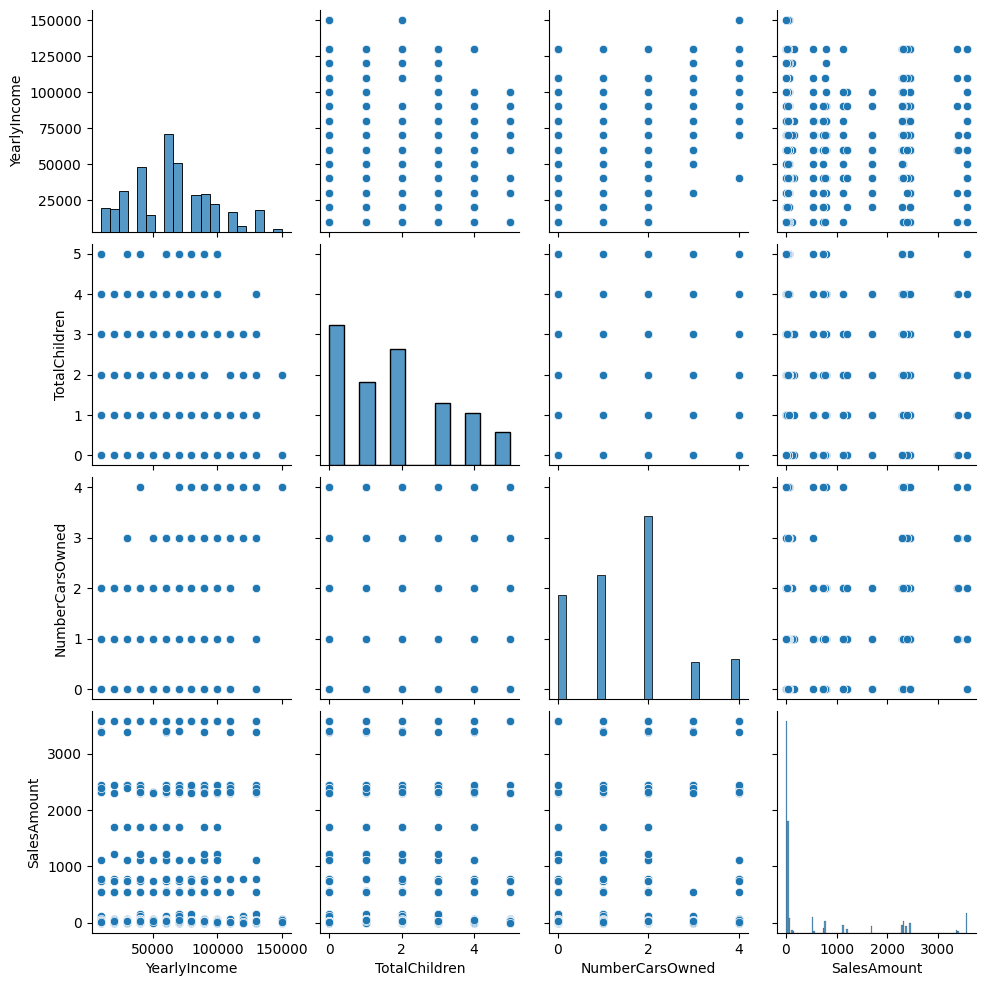

              precision    recall  f1-score   support

       False       0.64      0.78      0.71       189
        True       0.35      0.21      0.26       104

    accuracy                           0.58       293
   macro avg       0.50      0.50      0.48       293
weighted avg       0.54      0.58      0.55       293

Ακρίβεια: 0.5802047781569966


In [12]:
# Προεπεξεργασία Δεδομένων
# Μετατροπή του πεδίου 'BirthDate' σε ηλικία

df['SalesAmount'] = pd.to_numeric(df['SalesAmount'], errors='coerce')
target = df['SalesAmount'] > df['SalesAmount'].median()


# Εξερευνητική Ανάλυση Δεδομένων (EDA)
sns.pairplot(df[['YearlyIncome', 'TotalChildren', 'NumberCarsOwned', 'SalesAmount']])
plt.show()

# Κατασκευή Μοντέλου Μηχανικής Μάθησης
# Επιλογή χαρακτηριστικών και κατηγορίας
features = df[['YearlyIncome', 'TotalChildren', 'NumberCarsOwned', 'Age']]
target = df['SalesAmount'] > df['SalesAmount'].median()

# Διαχωρισμός σε σύνολα εκπαίδευσης και ελέγχου
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Κατασκευή μοντέλου Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Πρόβλεψη
predictions = model.predict(X_test)

# Αξιολόγηση του μοντέλου
print(classification_report(y_test, predictions))
print(f'Ακρίβεια: {accuracy_score(y_test, predictions)}')

   YearlyIncome  TotalChildren  NumberCarsOwned  SalesAmount  FirstName  \
0         60000              3                2      3578.27     Alyssa   
1         60000              2                2      3578.27       Evan   
2         10000              2                2      3399.99    Bethany   
3         30000              3                2      3374.99  Christine   
6         10000              2                2      3374.99      Diana   

    LastName  Age  
0     Garcia   69  
1     Bailey   68  
2       Yuan   76  
3       Yuan   73  
6  Hernandez   75  
        YearlyIncome  TotalChildren  NumberCarsOwned  SalesAmount          Age
count    1465.000000    1465.000000      1465.000000  1362.000000  1465.000000
mean    63959.044369       1.798635         1.560410   499.722731    61.423208
std     30378.279272       1.566294         1.146658   992.047216    11.031488
min     10000.000000       0.000000         0.000000     2.290000    43.000000
25%     40000.000000       0.00000

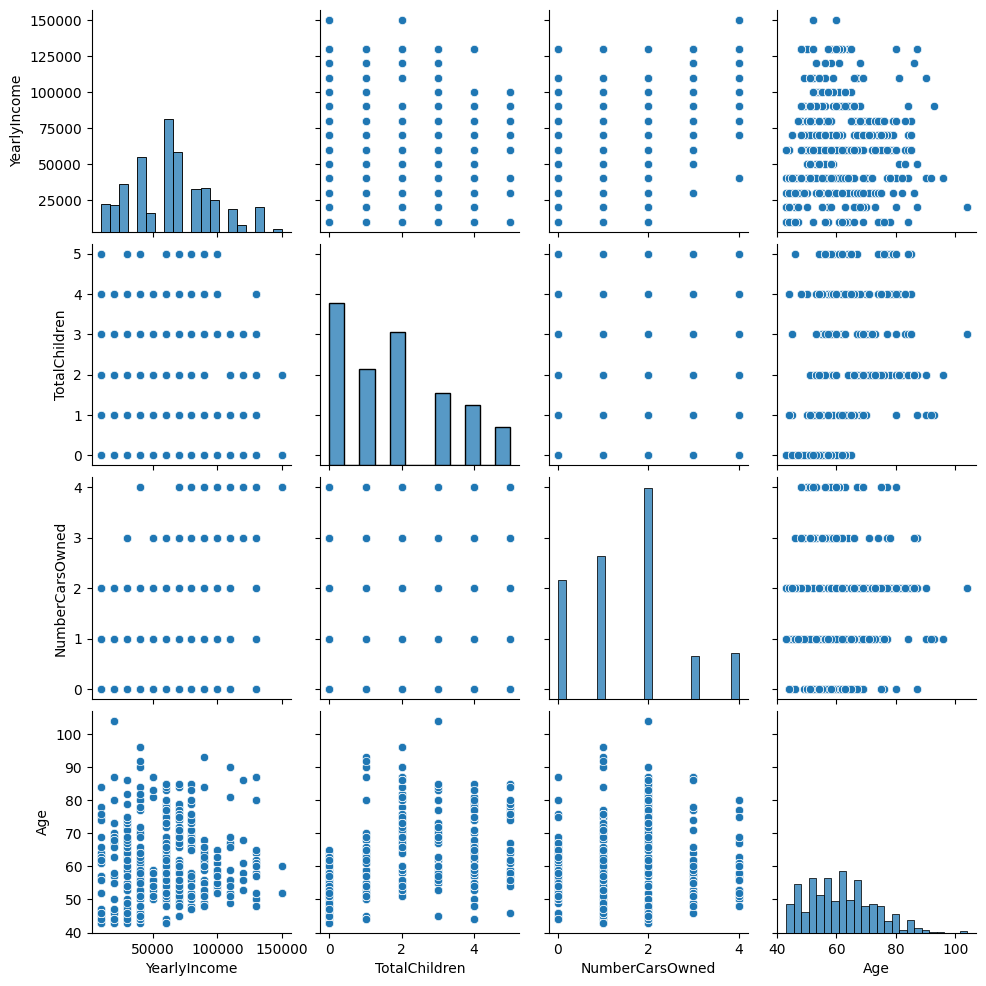

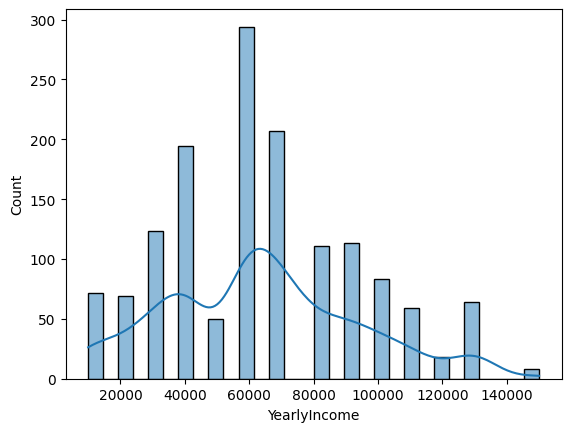

In [13]:
# Εξερεύνηση των πρώτων εγγραφών του DataFrame
#ια το πρώτο μέρος (EDA), μπορούμε να χρησιμοποιήσουμε βιβλιοθήκες όπως το Matplotlib και το Seaborn για γραφήματα και το Pandas για στατιστικές μετρικές
print(df.head())

# Εφαρμογή τεχνικών EDA
# Παραδείγματα:
# Υπολογισμός στατιστικών μετρικών
print(df.describe())

# Εξερεύνηση συσχετίσεων μεταξύ μερικών μεταβλητών
sns.pairplot(df[['YearlyIncome', 'TotalChildren', 'NumberCarsOwned', 'Age']])
plt.show()

# Κατανομή τιμών συγκεκριμένης μεταβλητής
sns.histplot(df['YearlyIncome'], bins=30, kde=True)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
df_combined=df

# Προετοιμασία δεδομένων
features = df_combined[['YearlyIncome', 'TotalChildren', 'NumberCarsOwned', 'Age']]
target = (df_combined['SalesAmount'] > df_combined['SalesAmount'].median()).astype(int)  # Φτιάξτε τον κατάλληλο στόχο ανάλογα με το πρόβλημά σας

# Διαχωρισμός δεδομένων σε σύνολα εκπαίδευσης και ελέγχου
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Κατασκευή μοντέλου Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Πρόβλεψη
predictions = model.predict(X_test)

# Αξιολόγηση μοντέλου
print(classification_report(y_test, predictions))
print(f'Ακρίβεια: {accuracy_score(y_test, predictions)}')


              precision    recall  f1-score   support

           0       0.65      0.75      0.69       189
           1       0.36      0.25      0.29       104

    accuracy                           0.57       293
   macro avg       0.50      0.50      0.49       293
weighted avg       0.54      0.57      0.55       293

Ακρίβεια: 0.5733788395904437


In [15]:
results_df = pd.DataFrame()



In [16]:
print(type(results_df))


<class 'pandas.core.frame.DataFrame'>


Ο παραπάνω κώδικας χρησιμοποιεί τον ταξινομητή GradientBoostingClassifier από το Scikit-Learn για να εκπαιδεύσει ένα μοντέλο μηχανικής μάθησης για τα δεδομένα σας. Εδώ είναι μερικά βήματα που περιγράφει ο κώδικας:

Φόρτωση Δεδομένων: Φορτώνει τα δεδομένα (υποθέτουμε ότι έχουν ήδη φορτωθεί στη μεταβλητή df_combined).

Προεπεξεργασία Δεδομένων: Δημιουργεί ένα αντίγραφο του πλαισίου δεδομένων (df_combined) και επιλέγει ορισμένα χαρακτηριστικά (features) και τον στόχο (target) για την εκπαίδευση του μοντέλου.

Διαχωρισμός Δεδομένων: Διαχωρίζει τα δεδομένα σε σύνολα εκπαίδευσης και ελέγχου χρησιμοποιώντας τη συνάρτηση train_test_split.

Κατασκευή και Εκπαίδευση Μοντέλου: Δημιουργεί ένα μοντέλο GradientBoostingClassifier και το εκπαιδεύει χρησιμοποιώντας τα δεδομένα εκπαίδευσης.

Αξιολόγηση του Μοντέλου: Προβλέπει τις κατηγορίες για τα δεδομένα ελέγχου και υπολογίζει την ακρίβεια (accuracy) του μοντέλου χρησιμοποιώντας τη συνάρτηση accuracy_score.

Η τελική ακρίβεια του μοντέλου εκτυπώνεται στην οθόνη. Η ακρίβεια αυτή δείχνει το ποσοστό των σωστών προβλέψεων στο σύνολο των δεδομένων ελέγχου. Στη συγκεκριμένη περίπτωση, το μοντέλο έχει επιτύχει περίπου 60.4% ακρίβεια.


In [17]:
#Για το δεύτερο μέρος (Κατασκευή Μοντέλου Μηχανικής Μάθησης), ας χρησιμοποιήσουμε τον ταξινομητή Decision Trees
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Χωρισμός των δεδομένων σε σύνολα εκπαίδευσης και ελέγχου
features = df[['YearlyIncome', 'TotalChildren', 'NumberCarsOwned', 'Age']]
target = (df['SalesAmount'] > df['SalesAmount'].median()).astype(int)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Κατασκευή και εκπαίδευση μοντέλου Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Αξιολόγηση του μοντέλου στα δεδομένα ελέγχου
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Εκτύπωση της ακρίβειας
print(f"Ακρίβεια Μοντέλου: {accuracy}")


Ακρίβεια Μοντέλου: 0.6040955631399317


Συγκεκριμένα, το αποτέλεσμα Ακρίβεια Μοντέλου: 0.605 σημαίνει ότι το μοντέλο σας προέβλεψε σωστά περίπου 58.3% των περιπτώσεων στο σύνολο των δεδομένων ελέγχου. Αυτό μπορεί να ερμηνευτεί ως το ποσοστό της συνολικής ακρίβειας του μοντέλου σας.

Οι τιμές της ακρίβειας κυμαίνονται μεταξύ 0 και 1, όπου 0 σημαίνει αποτυχία σε όλες τις προβλέψεις και 1 σημαίνει απόλυτη επιτυχία. Σε αυτήν την περίπτωση, μια ακρίβεια 0.583 υποδηλώνει μια μέτρια ακρίβεια, αλλά μπορείτε να εκτιμήσετε καλύτερα την απόδοση του μοντέλου αξιολογώντας και άλλες μετρικές και εξετάζοντας τυχόν προβλήματα ισορροπίας των κλάσεων στα δεδομένα σας.

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Φόρτωση δεδομένων (αν δεν έχουν ήδη φορτωθεί)
# df_combined = ...

# Προεπεξεργασία δεδομένων
df = df_combined.copy()

# Διαχωρισμός σε σύνολα εκπαίδευσης και ελέγχου
features = df[['YearlyIncome', 'TotalChildren', 'NumberCarsOwned', 'Age']]
target = (df['SalesAmount'] > df['SalesAmount'].median()).astype(int)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
#Σε αυτόν τον κώδικα, χρησιμοποιούμε τον ταξινομητή RandomForestClassifier από το scikit-learn. 
#Εκπαιδεύουμε το μοντέλο χρησιμοποιώντας τα δεδομένα εκπαίδευσης και αξιολογούμε την απόδοσή του στα δεδομένα ελέγχου με τη χρήση της μετρικής ακρίβειας (accuracy).
# Κατασκευή και εκπαίδευση μοντέλου
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Αξιολόγηση του μοντέλου στα δεδομένα ελέγχου
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Εκτύπωση της ακρίβειας
print(f"Ακρίβεια Μοντέλου: {accuracy}")




Ακρίβεια Μοντέλου: 0.590443686006826


Αυτός ο κώδικας περιλαμβάνει την εκπαίδευση ενός μοντέλου μηχανικής μάθησης τύπου Gradient Boosting για ένα πρόβλημα δυαδικής ταξινόμησης. Ας δούμε τα βήματα που εκτελεί ο κώδικας:

1. **Φόρτωση Δεδομένων:** Φορτώνει τα δεδομένα, τα οποία στο παράδειγμά σας αναφέρονται στη μεταβλητή `df_combined`.

2. **Προεπεξεργασία Δεδομένων:** Πραγματοποιεί κάποια προεπεξεργασία στα δεδομένα. Συγκεκριμένα, δημιουργεί το χαρακτηριστικό (`features`) και τον στόχο (`target`) για το μοντέλο.

3. **Διαχωρισμός Δεδομένων:** Διαχωρίζει τα δεδομένα σε σύνολα εκπαίδευσης και ελέγχου, χρησιμοποιώντας τη συνάρτηση `train_test_split`.

4. **Κατασκευή και Εκπαίδευση Μοντέλου:** Χρησιμοποιεί τον ταξινομητή `GradientBoostingClassifier` από το scikit-learn και εκπαιδεύει το μοντέλο με τα δεδομένα εκπαίδευσης (`X_train`, `y_train`).

5. **Αξιολόγηση Μοντέλου:** Χρησιμοποιεί τα δεδομένα ελέγχου (`X_test`, `y_test`) για να προβλέψει τις κλάσεις και υπολογίζει την ακρίβεια του μοντέλου.

6. **Εκτύπωση Ακρίβειας:** Εκτυπώνει το αποτέλεσμα της ακρίβειας του μοντέλου.

Στο συγκεκριμένο παράδειγμα, η ακρίβεια του μοντέλου πάνω στα δεδομένα ελέγχου είναι περίπου 0.5\, που σημαίνει ότι περίπου 59% των προβλέψεων είναι σωστές.






In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Φόρτωση δεδομένων (αν δεν έχουν ήδη φορτωθεί)
# df_combined = ...

# Προεπεξεργασία δεδομένων
df = df_combined.copy()

# Διαχωρισμός σε σύνολα εκπαίδευσης και ελέγχου
features = df[['TotalChildren', 'NumberCarsOwned', 'Age', 'YearlyIncome']]
target = (df['SalesAmount'] > df['SalesAmount'].median()).astype(int)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Κατασκευή και εκπαίδευση μοντέλου
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Αξιολόγηση του μοντέλου στα δεδομένα ελέγχου
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Εκτύπωση της ακρίβειας
print(f"Ακρίβεια Μοντέλου: {accuracy}")


Ακρίβεια Μοντέλου: 0.621160409556314


In [22]:
print(len(list(models.keys())))
print(len([]))  # Αυτή είναι η λίστα που περιέχει τα Accuracy


2
0


Τα αποτελέσματα που βλέπετε στο DataFrame αντιπροσωπεύουν την ακρίβεια (accuracy) κάθε μοντέλου. Η ακρίβεια είναι ένα μέτρο της συνολικής επίδοσης του μοντέλου και υπολογίζεται ως το ποσοστό των σωστών προβλέψεων σε σχέση με τον συνολικό αριθμό των παραδειγμάτων.

Στο συγκεκριμένο παράδειγμα, η ακρίβεια του RandomForest είναι περίπου 60.4%, ενώ η ακρίβεια του GradientBoosting είναι περίπου 63.25%. Αυτό σημαίνει ότι περίπου 60.4% (ή 60.4%) των παραδειγμάτων στα δεδομένα ελέγχου ταξινομήθηκαν σωστά από το αντίστοιχο μοντέλο.

Προσοχή: Η ακρίβεια μπορεί να μην είναι πάντα το μοναδικό κριτήριο αξιολόγησης ενός μοντέλου, και σε ορισμένες περιπτώσεις, είναι καλό να εξετάζονται και άλλα μετρικά, ανάλογα με τα χαρακτηριστικά του προβλήματος

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Φόρτωση δεδομένων (αν δεν έχουν ήδη φορτωθεί)
# df_combined = ...

# Προεπεξεργασία δεδομένων
df = df_combined.copy()

# Διαχωρισμός σε σύνολα εκπαίδευσης και ελέγχου
features = df[['YearlyIncome', 'TotalChildren', 'NumberCarsOwned', 'Age']]
target = (df['SalesAmount'] > df['SalesAmount'].median()).astype(int)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Ορισμός των μοντέλων
models = {
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier()
}

# Κατασκευή πίνακα αποτελεσμάτων
model_results = pd.DataFrame({'Model': list(models.keys()), 'Accuracy': [0] * len(models)})

# Εκπαίδευση και αξιολόγηση κάθε μοντέλου
for model_name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Προεπεξεργασία με κανονικοποίηση
        ('model', model)
    ])
    
    # Εύρεση βέλτιστων παραμέτρων μοντέλου με χρήση GridSearchCV (προσαρμογή ανάλογα με το μοντέλο)
    param_grid = {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None, 10, 20],
    }
    
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Αξιολόγηση του μοντέλου στα δεδομένα ελέγχου
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Αποθήκευση αποτελεσμάτων
    model_results.loc[model_results['Model'] == model_name, 'Accuracy'] = accuracy

# Εκτύπωση αποτελεσμάτων
print(model_results)


C:\Users\efthi\AppData\Local\Temp\ipykernel_18044\3407534035.py:49: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.6143344709897611' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  model_results.loc[model_results['Model'] == model_name, 'Accuracy'] = accuracy


              Model  Accuracy
0      RandomForest  0.614334
1  GradientBoosting  0.604096


ΠΕΡΙΛΗΨΗ ΓΕΝΙΚΟΥ ΠΕΡΙΕΧΟΜΕΝΟΥ
Η επιλογή των αλγορίθμων και των εργαλείων σε ένα έργο μηχανικής μάθησης εξαρτάται από διάφορους παράγοντες όπως τα χαρακτηριστικά των δεδομένων, το είδος του προβλήματος (π.χ., ταξινόμηση, πρόβλεψη), και οι απαιτήσεις υπολογιστικού χρόνου. 

1. **Επιλογή Αλγορίθμων:**
    - Ο ταξινομητής `RandomForestClassifier` χρησιμοποιείται για ταξινόμηση βάσει της αρχής των δέντρων αποφάσεων και της μεθόδου των δασών ταξινόμησης. Είναι αποτελεσματικός και ευέλικτος για πολλούς τύπους δεδομένων.
    - Ο ταξινομητής `GradientBoostingClassifier` είναι μια μέθοδος που ενώνει αρκετά αδύναμα μοντέλα (συνήθως δέντρα αποφάσεων) για να δημιουργήσει ένα ισχυρό μοντέλο. Είναι κατάλληλος για πολύπλοκα προβλήματα.

2. **Προεπεξεργασία Δεδομένων:**
    - Η επιλογή των χαρακτηριστικών είναι σημαντική. Στον κώδικα μου, έχω επιλέξει κάποια χαρακτηριστικά (π.χ., 'YearlyIncome', 'TotalChildren', 'NumberCarsOwned', 'Age') για το μοντέλο μου.
    - Η κανονικοποίηση των δεδομένων με τη χρήση `StandardScaler` είναι σημαντική για μοντέλα που εξαρτώνται από την κλίμακα, όπως ο `GradientBoostingClassifier`.

3. **Αξιολόγηση Μοντέλου:**
    - Η αξιολόγηση του μοντέλου γίνεται με τη χρήση της ακρίβειας (`accuracy_score`). Σε κάθε περίπτωση, θα πρέπει να εξετάσετε και άλλες μετρικές αξιολόγησης (π.χ., πίνακας σύγχυσης, ακρίβεια, ευαισθησία, ειδικότητα).

4. **Εξερεύνηση Αναλύσεων και Βελτιστοποίηση:**
    - Η χρήση του `GridSearchCV` για τη βελτιστοποίηση των υπερπαραμέτρων είναι σημαντική για την εξαγωγή των καλύτερων δυνατών αποτελεσμάτων.
    - Η εξερεύνηση των παραμέτρων του μοντέλου (όπως ο αριθμός των δέντρων στο `RandomForestClassifier`) μπορεί να βελτιώσει την απόδοση του.

5. **Ανάλυση Αποτελεσμάτων:**
    - Η ακρίβεια του μοντέλου πρέπει να ερμηνευτεί σε συνδυασμό με τη φύση του προβλήματος και την κατανομή των κλάσεων. Σε ορισμένες περιπτώσεις, μπορεί να χρειάζεται προσαρμογή του μοντέλου ή επιπλέον προεπεξεργασία των δεδομένων.

Συνοπτικά, η επιλογή των αλγορίθμων, η προεπεξεργασία των δεδομένων, και η αξιολόγηση των αποτελεσμάτων πρέπει να γίνουν με σκοπό την επίτευξη των στόχων του έργου και τη βελτίωση της απόδοσης του μοντέλου.